In [1]:
import pandas as pd

### Ejercicio 1

In [2]:
# Cargar el dataset desde un archivo CSV
df = pd.read_csv('permisos_construccion.csv')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15132\4171189080.py:2: DtypeWarning: Columns (22,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('permisos_construccion.csv')


### Ejercicio 3

#### a) Calcular y mostrar la cantidad de filas y columnas:


In [3]:
# Calcular la cantidad de filas y columnas
filas, columnas = df.shape

# Mostrar la cantidad de filas y columnas
print(f'Cantidad de filas: {filas}')
print(f'Cantidad de columnas: {columnas}')

Cantidad de filas: 198910
Cantidad de columnas: 43


#### b) Observar y mostrar las primeras 5 filas:

In [4]:
# Mostrar las primeras 5 filas del DataFrame
print(df.head(5))

  Permit Number  Permit Type  Permit Type Definition Permit Creation Date  \
0       M788927            8  otc alterations permit           05/23/2017   
1  201305318356            8  otc alterations permit           05/31/2013   
2  201705106205            8  otc alterations permit           05/10/2017   
3  201410279983            8  otc alterations permit           10/27/2014   
4  201310280388            8  otc alterations permit           10/28/2013   

  Block   Lot  Street Number Street Number Suffix Street Name Street Suffix  \
0  0215   001           1333                  NaN       jOnEs            St   
1  1810  017A           1483                  NaN        43rD            Av   
2  5700   027            431                  NaN    pReNtIsS            St   
3  0661   005           2020                  NaN        bUsH            St   
4  3642  051A            871                  NaN        cApP            St   

   ...  Existing Construction Type Existing Construction Type 

#### c) Evaluar la existencia de datos faltantes y duplicados. Cuantificarlos y calcular el porcentaje sobre el total de filas:

In [5]:
# Evaluar datos faltantes
datos_faltantes = df.isnull().sum()

# Calcular el porcentaje de datos faltantes sobre el total de filas
porcentaje_faltantes = (datos_faltantes / len(df)) * 100

# Mostrar datos faltantes y sus porcentajes
print('Datos faltantes por columna:')
print(datos_faltantes)
print('\nPorcentaje de datos faltantes por columna (%):')
print(porcentaje_faltantes)

# Evaluar datos duplicados
duplicados = df.duplicated().sum()

# Mostrar la cantidad de filas duplicadas
print(f'\nCantidad de filas duplicadas: {duplicados}')

# Calcular el porcentaje de filas duplicadas sobre el total de filas
porcentaje_duplicados = (duplicados / len(df)) * 100

# Mostrar el porcentaje de filas duplicadas
print(f'\nPorcentaje de filas duplicadas: {porcentaje_duplicados} %')

Datos faltantes por columna:
Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196694
Street Name                                    0
Street Suffix                               2768
Unit                                      169430
Unit Suffix                               196949
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14942
Completed Date                            101715
First Construction Document Date           14948
Structural Notification                 

#### d) Para los datos faltantes, evaluar posibles motivos de esto en cada caso:

In [6]:
# Mostrar los valores únicos para cada columna que le falten datos
cantidad_filas = df.shape[0]

for column in df.columns:
    valores_unicos = df[column].unique()
    valores_faltantes = df[column].isnull().sum()

    if (valores_faltantes > 0):
        print(f'\nValores únicos en la columna {column}:')
        print(valores_unicos)
        print(f'Valores faltantes en la columna {valores_faltantes} de un total de {cantidad_filas} filas')


Valores únicos en la columna Street Number Suffix:
[nan 'B' 'A' 'V' 'D' 'K' 'C' 'F' 'H' 'E' 'L' 'J' 'R' 'P' 'I' 'N' 'G' '½'
 '0']
Valores faltantes en la columna 196694 de un total de 198910 filas

Valores únicos en la columna Street Suffix:
['St' 'Av' 'Bl' nan 'Wy' 'Dr' 'Hy' 'Tr' 'Rd' 'Ct' 'Pl' 'Pk' 'Ln' 'Cr' 'Pz'
 'Al' 'No' 'Rw' 'Wk' 'So' 'Hl' 'Sw']
Valores faltantes en la columna 2768 de un total de 198910 filas

Valores únicos en la columna Unit:
[      nan 0.000e+00 5.010e+02 3.000e+00 7.000e+00 2.000e+00 2.160e+02
 2.030e+02 2.020e+02 6.000e+00 1.000e+00 1.100e+01 1.300e+01 3.700e+01
 5.050e+02 3.210e+02 1.060e+02 4.000e+00 2.370e+02 1.170e+02 3.100e+01
 4.230e+02 3.010e+02 1.050e+02 5.100e+01 2.010e+02 1.040e+02 9.180e+02
 1.010e+02 1.401e+03 5.000e+00 3.050e+02 7.010e+02 8.010e+02 1.370e+03
 7.050e+02 4.070e+02 1.005e+03 3.600e+02 8.300e+02 8.020e+02 2.040e+02
 1.632e+03 1.004e+03 2.360e+02 1.020e+02 4.010e+02 5.070e+02 6.180e+02
 1.704e+03 1.602e+03 3.020e+02 6.080e+02 4.100e

Viendo los datos obtenidos anteriormente de las columnas que tienen datos vacíos y sus valores únicos deducimos los siguientes posibles motivos:

- Street Number Suffix: los datos vacíos pueden ser porque no se conocen o no apliquen para esta dirección. Esto se dedujo porque hay muchos vacíos.
- Street Suffix: los datos vacíos pueden ser porque no se conocen o no apliquen para esta dirección. Igualmente son pocos los faltantes.
- Unit: los datos vacíos pueden ser porque no se conocen o no apliquen para este edificio. Esto se dedujo porque hay muchos vacíos y hay mucha variedad de valores únicos.
- Unit Suffix: los datos vacíos pueden ser porque no se conocen o no apliquen para este edificio. Esto se dedujo porque hay muchos vacíos y hay mucha variedad de valores únicos.
- Descripción: no se ingresó, por lo tanto no se conoce. Son muy pocos los vacíos.
- Issued Date: tal vez hubo errores de no ingresar la fecha, los faltantes son pocos. Tal vez el permiso no se expidió aún.
- Completed Date: los faltantes de esta columna deberían corresponder a las construcciones que aún no finalizaron.
- First Construction Document Date: los faltantes deberían ser de aquellas obras en las que aún no se inicio la construcción.
- Structural Notification: hay una gran cantidad de datos faltantes, lo que significa que la gran mayoría de los permisos no tendrían que cumplir o tener en cuenta alguna notificación estructural.
- Number of Existing Stories: los datos faltantes podrían darse porque la construcción aún no ha comenzado y no tiene pisos actualmente. También, como se aclara en la metadata, este atributo no aplica para ciertos permisos. Este item aplicaría más para remodelaciones.
- Number of Proposed Stories: al igual que en los pisos existentes, los propuestos podrían no aplicar para ciertos permisos.
- Voluntary Soft-Story Retrofit: la mayoría de los datos son vacíos, esto puede ser porque solo unos pocos permisos cuentan con la protección contra terremotos.
- Fire Only Permit: Al igual que en la anterior, son pocos los permisos relacionados a la prevención de incendios.
- Permit Expiration Date: los faltantes en esta columna podrían ser porque simplemente los permisos no tienen una fecha de vencimiento o la misma es a futuro en el largo plazo.
- Estimated Cost: los faltantes aquí pueden ser debido a costos bajos que se omitieron, otros que son dificiles o no se tomo el trabajo de estimar.
- Revised Cost: aquí los faltantes son menos, quizás debido a una instancia obligatoria o recomendada de revisar el costo estimado.
- Existing Use: los faltantes en esta columna pueden ser debido a que la construcción aun no existe o no está terminada, o por usos diversos.
- Existing Units: los faltantes pueden ser debido a que la construcción aún no existe o no aplican las 'unidades' al permiso en cuestión.
- Proposed Use: los faltantes pueden ser porque el/los uso/s no está/n claro/s o no tiene uno específico.
- Proposed Units: los que faltan podrían ser porque se considera que no corresponde la división por unidades en esos permisos.
- Plansets: los faltantes podrían ser por falta de planos formales de construcción o que estén por fuera del permiso.
- TIDF Compliance: la mayoría faltan, y puede ser debido al desconocimiento de este requerimiento legal (por ser nuevo)
- Existing Construction Type: los que faltan pueden ser porque el tipo de construcción no está en las categorías existentes o no se le encuentra el tipo.
- Existing Construction Type Description: el mismo motivo que el anterior.
- Proposed Construction Type: 
- Proposed Construction Type Description
- Site Permit
- Supervisor District
- Neighborhoods - Analysis Boundaries

#### e) Para variables discretas, evaluar los posibles valores de cada variable (valores únicos):

In [7]:
# Mostrar los valores únicos y vacios para cada columna
for column in df.columns:
    valores_unicos = df[column].unique()
    print(f'\nValores únicos en la columna {column}:')
    print(valores_unicos)
    


Valores únicos en la columna Permit Number:
['M788927' '201305318356' '201705106205' ... '201607293741' '201701066691'
 '201604255599']

Valores únicos en la columna Permit Type:
[8 2 4 3 6 1 7 5]

Valores únicos en la columna Permit Type Definition:
['otc alterations permit' 'new construction wood frame' 'sign - erect'
 'additions alterations or repairs' 'demolitions' 'new construction'
 'wall or painted sign' 'grade or quarry or fill or excavate'
 ' otc alterations permit ' ' new construction '
 'otc alterations permit #' 'new construction #'
 ' additions alterations or repairs ']

Valores únicos en la columna Permit Creation Date:
['05/23/2017' '05/31/2013' '05/10/2017' ... '2017-02-10' '2016-11-14'
 '2013-03-06']

Valores únicos en la columna Block:
['0215' '1810' '5700' ... '4976' '6125' '6757']

Valores únicos en la columna Lot:
['001' '017A' '027' ... '018X' '031H' '030E']

Valores únicos en la columna Street Number:
[1333 1483  431 ... 4183 6237 4848]

Valores únicos en la col

#### f) Cuantificar los valores únicos del punto e) y realizar histogramas:


Cuantificación de valores únicos en Permit Type:
Permit Type
8    178852
3     14664
4      2892
2       950
6       600
7       511
1       350
5        91
Name: count, dtype: int64


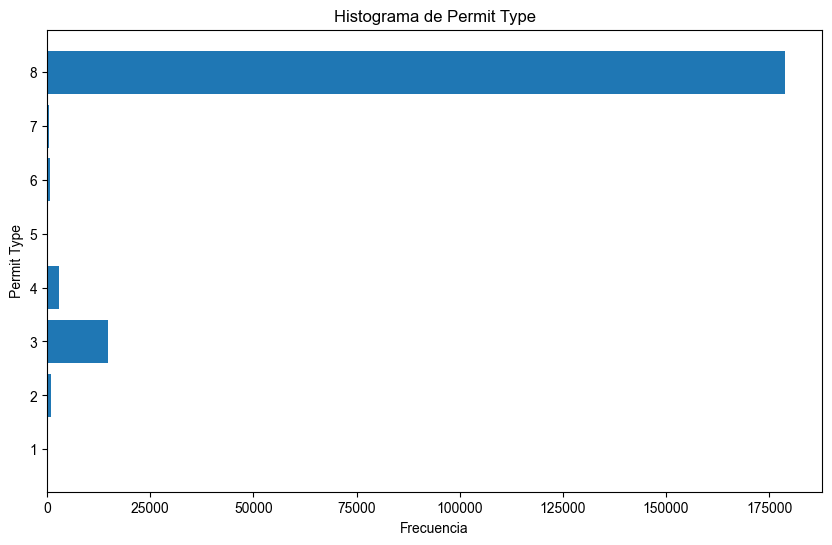


Cuantificación de valores únicos en Permit Type Definition:
Permit Type Definition
otc alterations permit                 178836
additions alterations or repairs        14663
sign - erect                             2892
new construction wood frame               950
demolitions                               600
wall or painted sign                      511
new construction                          347
grade or quarry or fill or excavate        91
 otc alterations permit                     8
otc alterations permit #                    8
new construction #                          2
 new construction                           1
 additions alterations or repairs           1
Name: count, dtype: int64


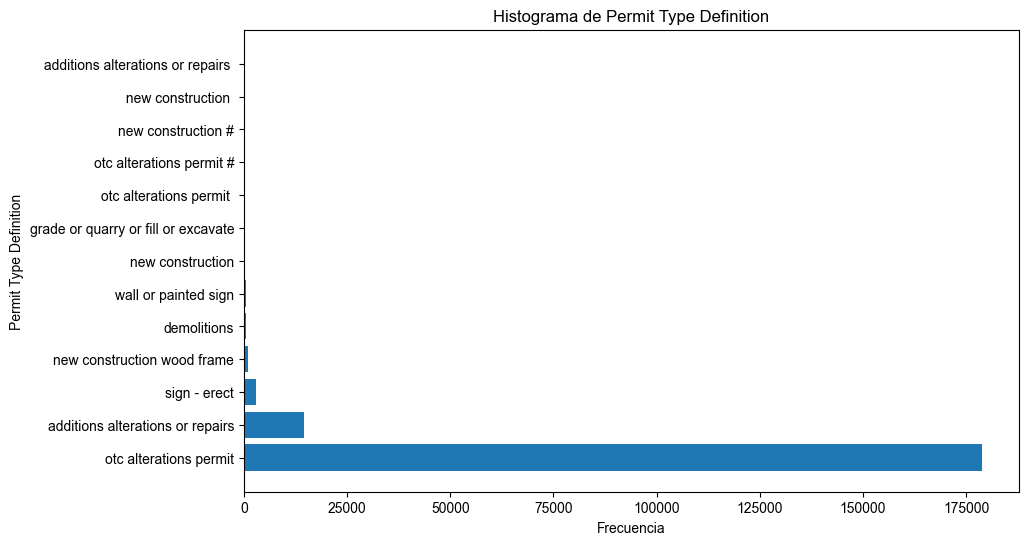


Cuantificación de valores únicos en Description:
Description
street space                                                                                                                                                                  22163
reroofing                                                                                                                                                                      9467
street space permit                                                                                                                                                            7549
re-roofing                                                                                                                                                                     2351
streetspace                                                                                                                                                                     819
                                      

KeyboardInterrupt: 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

valores_discretos = ['Permit Type','Permit Type Definition', 'Description', 'Current Status', 'Fire Only Permit','TIDF Compliance', 'Existing Construction Type','Existing Construction Type Description','Proposed Construction Type','Proposed Construction Type Description']

#Normalmente tarda 5 minutos y 30 segundos para renderizar los graficos
for column in valores_discretos:
    
        # Cuantificar los valores únicos
    value_counts = df[column].value_counts()

    print(f'\nCuantificación de valores únicos en {column}:')
    print(value_counts)

        # Crear un histograma para la variable categórica
    plt.rcParams['font.family'] = 'Arial'    
    plt.figure(figsize=(10, 6))
    plt.barh(value_counts.index, value_counts.values)  # Gráfico de barras horizontales
    plt.title(f'Histograma de {column}')
    plt.xlabel('Frecuencia')
    plt.ylabel(column)
    plt.show()

#### g) Evaluar la existencia de datos inconsistentes:

In [9]:

inconsistent_data = []

# Check for inconsistent data in numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    inconsistent_values = df[column].loc[pd.to_numeric(df[column], errors='coerce').isna() & df[column].notna()]
    if not inconsistent_values.empty:
        inconsistent_data.append((column, inconsistent_values))

# Check for inconsistent data in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    inconsistent_values = df[column].loc[~df[column].apply(lambda x: isinstance(x, str)) & df[column].notna()]
    if not inconsistent_values.empty:
        inconsistent_data.append((column, inconsistent_values))

# Print the inconsistent data
if inconsistent_data:
    print("Inconsistent data found:")
    for column, values in inconsistent_data:
        print(f"Column: {column}")
        print(f"Inconsistent values: \n{values}\n")
else:
    print("No inconsistent data found.")


# Filtrar y mostrar los datos inconsistentes en la columna 'Supervisor District' 
inconsistent_supervisor_district = df['Supervisor District'].loc[
    pd.to_numeric(df['Supervisor District'], errors='coerce').isna() & df['Supervisor District'].notna()
]

print("Datos inconsistentes en la columna 'Supervisor District':")
print(inconsistent_supervisor_district)

print()

# Mostrar un rango de filas alrededor de la fila 16384
print(df['Permit Number'].iloc[16370:16390])

print("Tipos de datos de las columnas:")
print(df.dtypes)

#comment to make push


Inconsistent data found:
Column: Supervisor District
Inconsistent values: 
16384      7.0
16385      5.0
16386      7.0
16387      3.0
16388     11.0
          ... 
198905     7.0
198906    10.0
198907    10.0
198908     3.0
198909     6.0
Name: Supervisor District, Length: 148505, dtype: object

Datos inconsistentes en la columna 'Supervisor District':
2284      quince
97312     veinte
126129      diez
Name: Supervisor District, dtype: object

16370    201708043992
16371    201611283518
16372    201301248729
16373    201510291136
16374    201701207526
16375    201308063640
16376    201303263045
16377    201602169707
16378    201612024057
16379    201510230706
16380    201705318008
16381         M461987
16382    201502188590
16383         M585487
16384    201504163759
16385    201505015115
16386    201302049375
16387    201306058703
16388    201504284796
16389    201408042919
Name: Permit Number, dtype: object
Tipos de datos de las columnas:
Permit Number                              o

Lo que pasa es que al haber valores no númericos en la columna, toma toda la columna como objeto y aparecen como incosistentes los datos númericos: por esto extraemos los datos que efectivamente son strings, lo cual es lo verdaderamente incosistente.